## **Outline of Steps to be carried out**

1) Importing necessary Libraries

2) Importing the dataset

3) Analyzing the dataset

4) Analyzing the missing values

5) Analyzing the categorical variables

6) Analyzing the numerical variables

7) Imputing (Handling the missing values) / One Hot Encoding

8) Down sampling for making the data balanced

9) Splitting the dataset into test-train split

10) Feature Scaling

11) Training the model

12) Accuracy/ Confusion Matrix/ Roc Curve

### Importing necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)  

### Importing the dataset

In [3]:
df = pd.read_csv("./CardioVascular.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,Female,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,Male,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,Male,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,Female,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,Male,156,56.0,100,60,1,1,0,0,0,0


#### Columns of the dataset

id - patient id

age

gender

height

weight

ap_hi - Systolic blood pressure

ap_lo - Diastolic blood pressure

cholesterol - 3 classes (1/2/3)

gluc - 3 classes (1/2/3)

smoke - Does the patient smokes or not

alco - Does the patient consumes alcohol or not

active - Physical Activity of the patient

cardio - 0/1, 0-implies no risk, 1-implies risk of heart disease

In [4]:
df2 = df.copy()

### Analyzing the dataset

In [5]:
df.shape

(30252, 13)

In [6]:
df.describe()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,30252.000000,30252.000000,30252.000000,30252.000000,30252.000000,30252.00000,30252.000000,30252.000000,30252.000000,30252.000000,30252.000000,30252.000000
mean,21597.635231,19457.505553,164.399213,74.165649,128.293799,97.15599,1.363150,1.223489,0.090407,0.053682,0.802129,0.497554
std,12492.567420,2475.463410,8.231116,14.344604,133.227148,197.97330,0.677769,0.569578,0.286769,0.225394,0.398401,0.500002
min,0.000000,10798.000000,55.000000,22.000000,-140.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,10791.750000,17645.000000,159.000000,65.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,21625.500000,19695.000000,165.000000,72.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,32409.250000,21319.000000,170.000000,82.000000,140.000000,90.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,43268.000000,23690.000000,250.000000,200.000000,14020.000000,10000.00000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30252 entries, 0 to 30251
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           30252 non-null  int64  
 1   age          30252 non-null  int64  
 2   gender       30252 non-null  object 
 3   height       30252 non-null  int64  
 4   weight       30252 non-null  float64
 5   ap_hi        30252 non-null  int64  
 6   ap_lo        30252 non-null  int64  
 7   cholesterol  30252 non-null  int64  
 8   gluc         30252 non-null  int64  
 9   smoke        30252 non-null  int64  
 10  alco         30252 non-null  int64  
 11  active       30252 non-null  int64  
 12  cardio       30252 non-null  int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 3.0+ MB


ID does not have any role in deciding the cardio. So that column needs to be seperated


In [8]:
# Dropping ID
df = df.drop('id', axis=1)
# Converting the age column into years
df['age'] = (df['age'] / 365).astype('int')
df.head(3) 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,Female,168,62.0,110,80,1,1,0,0,1,0
1,55,Male,156,85.0,140,90,3,1,0,0,1,1
2,51,Male,165,64.0,130,70,3,1,0,0,0,1


### Analyzing the missing values

<Axes: >

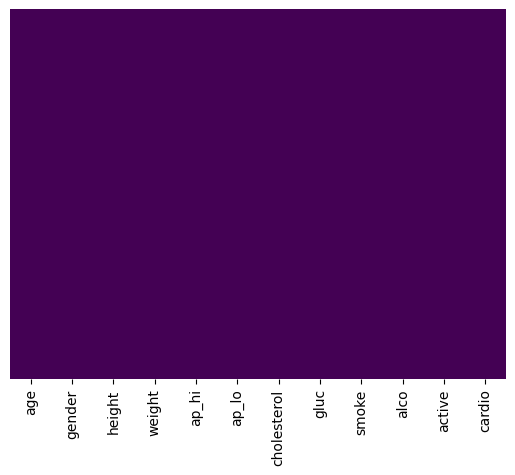

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# We analyze the amount of nan values and in which column they are present using a heatmap 

In [10]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

No NaN values are present in the dataset

### Analyzing the categorical variables

In [11]:
# making a list of features having categorical values
categorical_features = [features for features in df.columns if df[features].dtypes=='O']
# categorical_features

for features in categorical_features:
    print('The feature is {} and number of categories are {}'.format(features,len(df[features].unique())))

The feature is gender and number of categories are 2


Plotting graphs to see the frequency of heart attack risk w.r.t categorical features

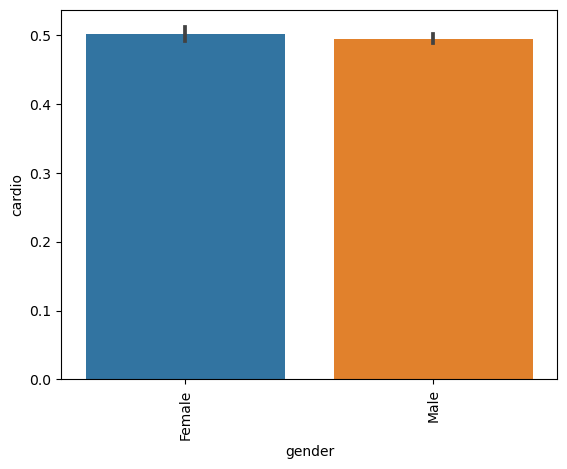

In [12]:
plot = sns.barplot(x=df['gender'],y=df['cardio'],estimator=np.mean)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show() 

We observe that the gender class hardly make a significant difference in the Heart attack risk predicition.

### Analyzing the numerical variables

In [13]:
#making a list of features having numerical values
numerical_features = [features for features in df.columns if df[features].dtypes != 'O' and features!='cardio']

numerical_features

['age',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active']

In [14]:
#Seperating continuous and discrete features
discrete_numerical_features = [features for features in numerical_features if (len(df[features].unique()))<25]
continuous_numerical_features = [features for features in numerical_features if (len(df[features].unique()))>25] 

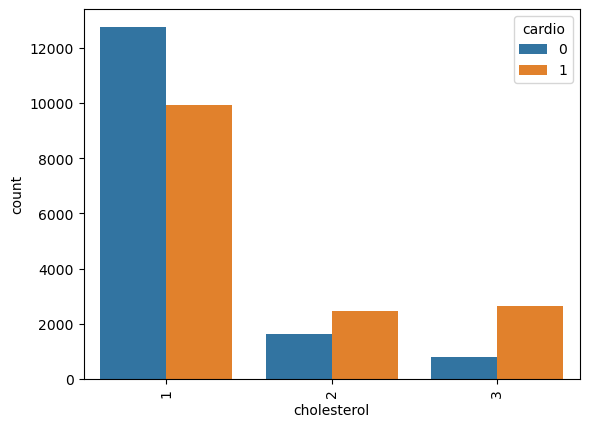

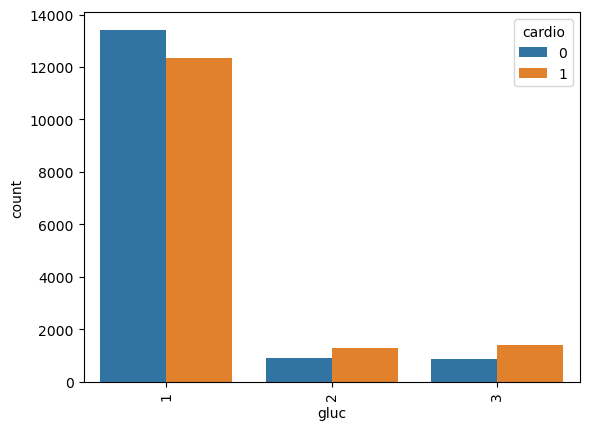

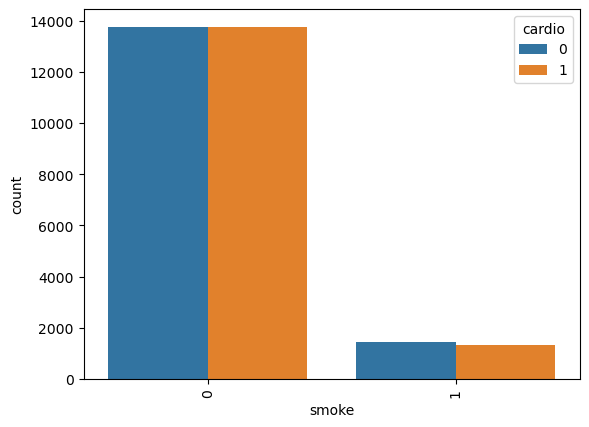

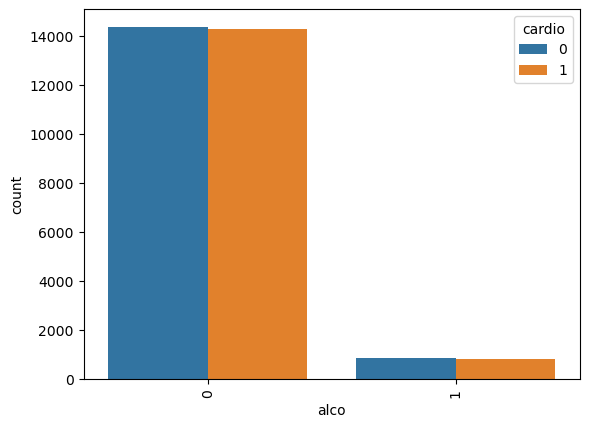

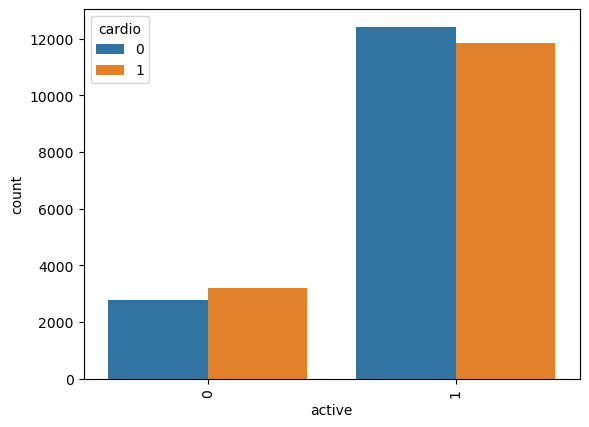

In [15]:
for features in discrete_numerical_features:
    plot = sns.countplot(df, x = features, hue='cardio')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plt.show()

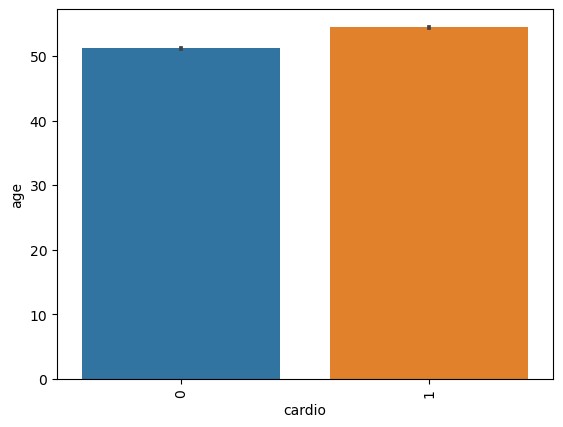

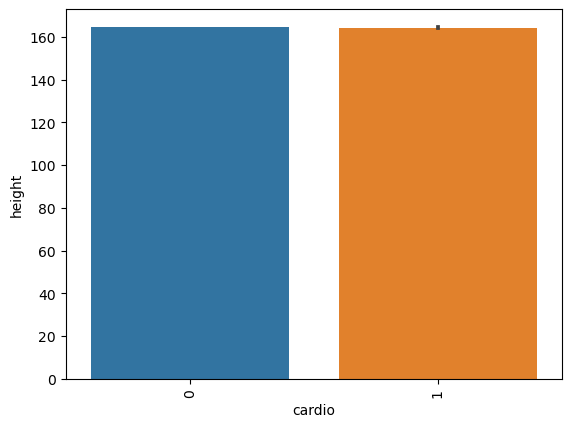

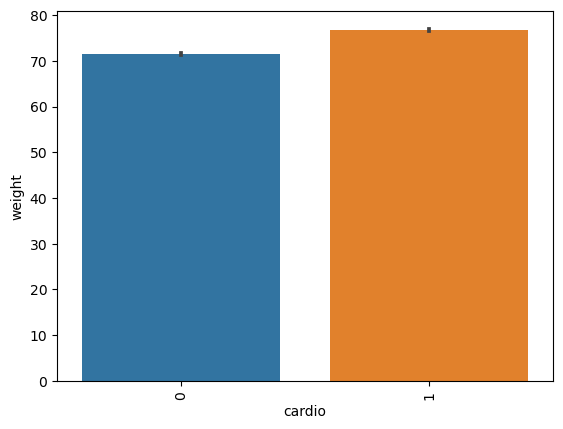

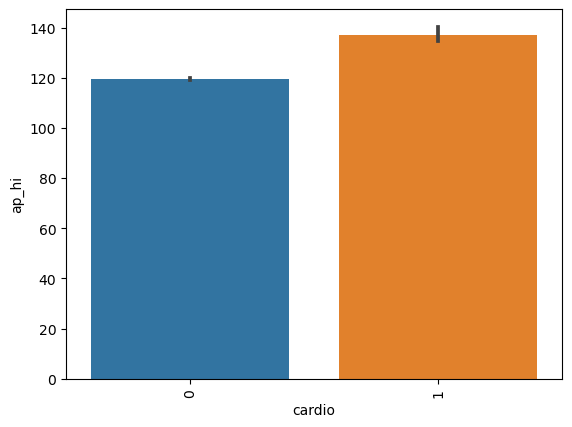

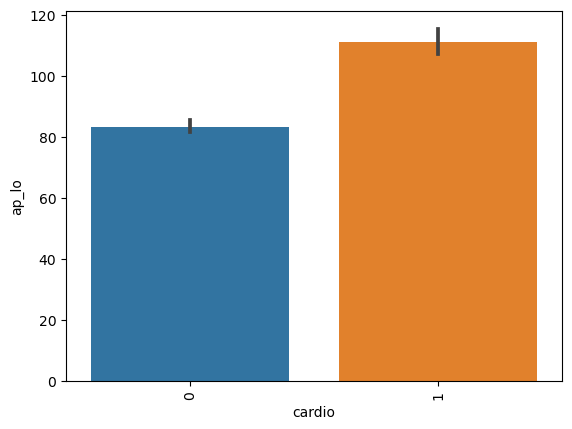

In [16]:
for features in continuous_numerical_features:
    plot = sns.barplot(y = df[features], x=df['cardio'])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plt.show()

<Axes: >

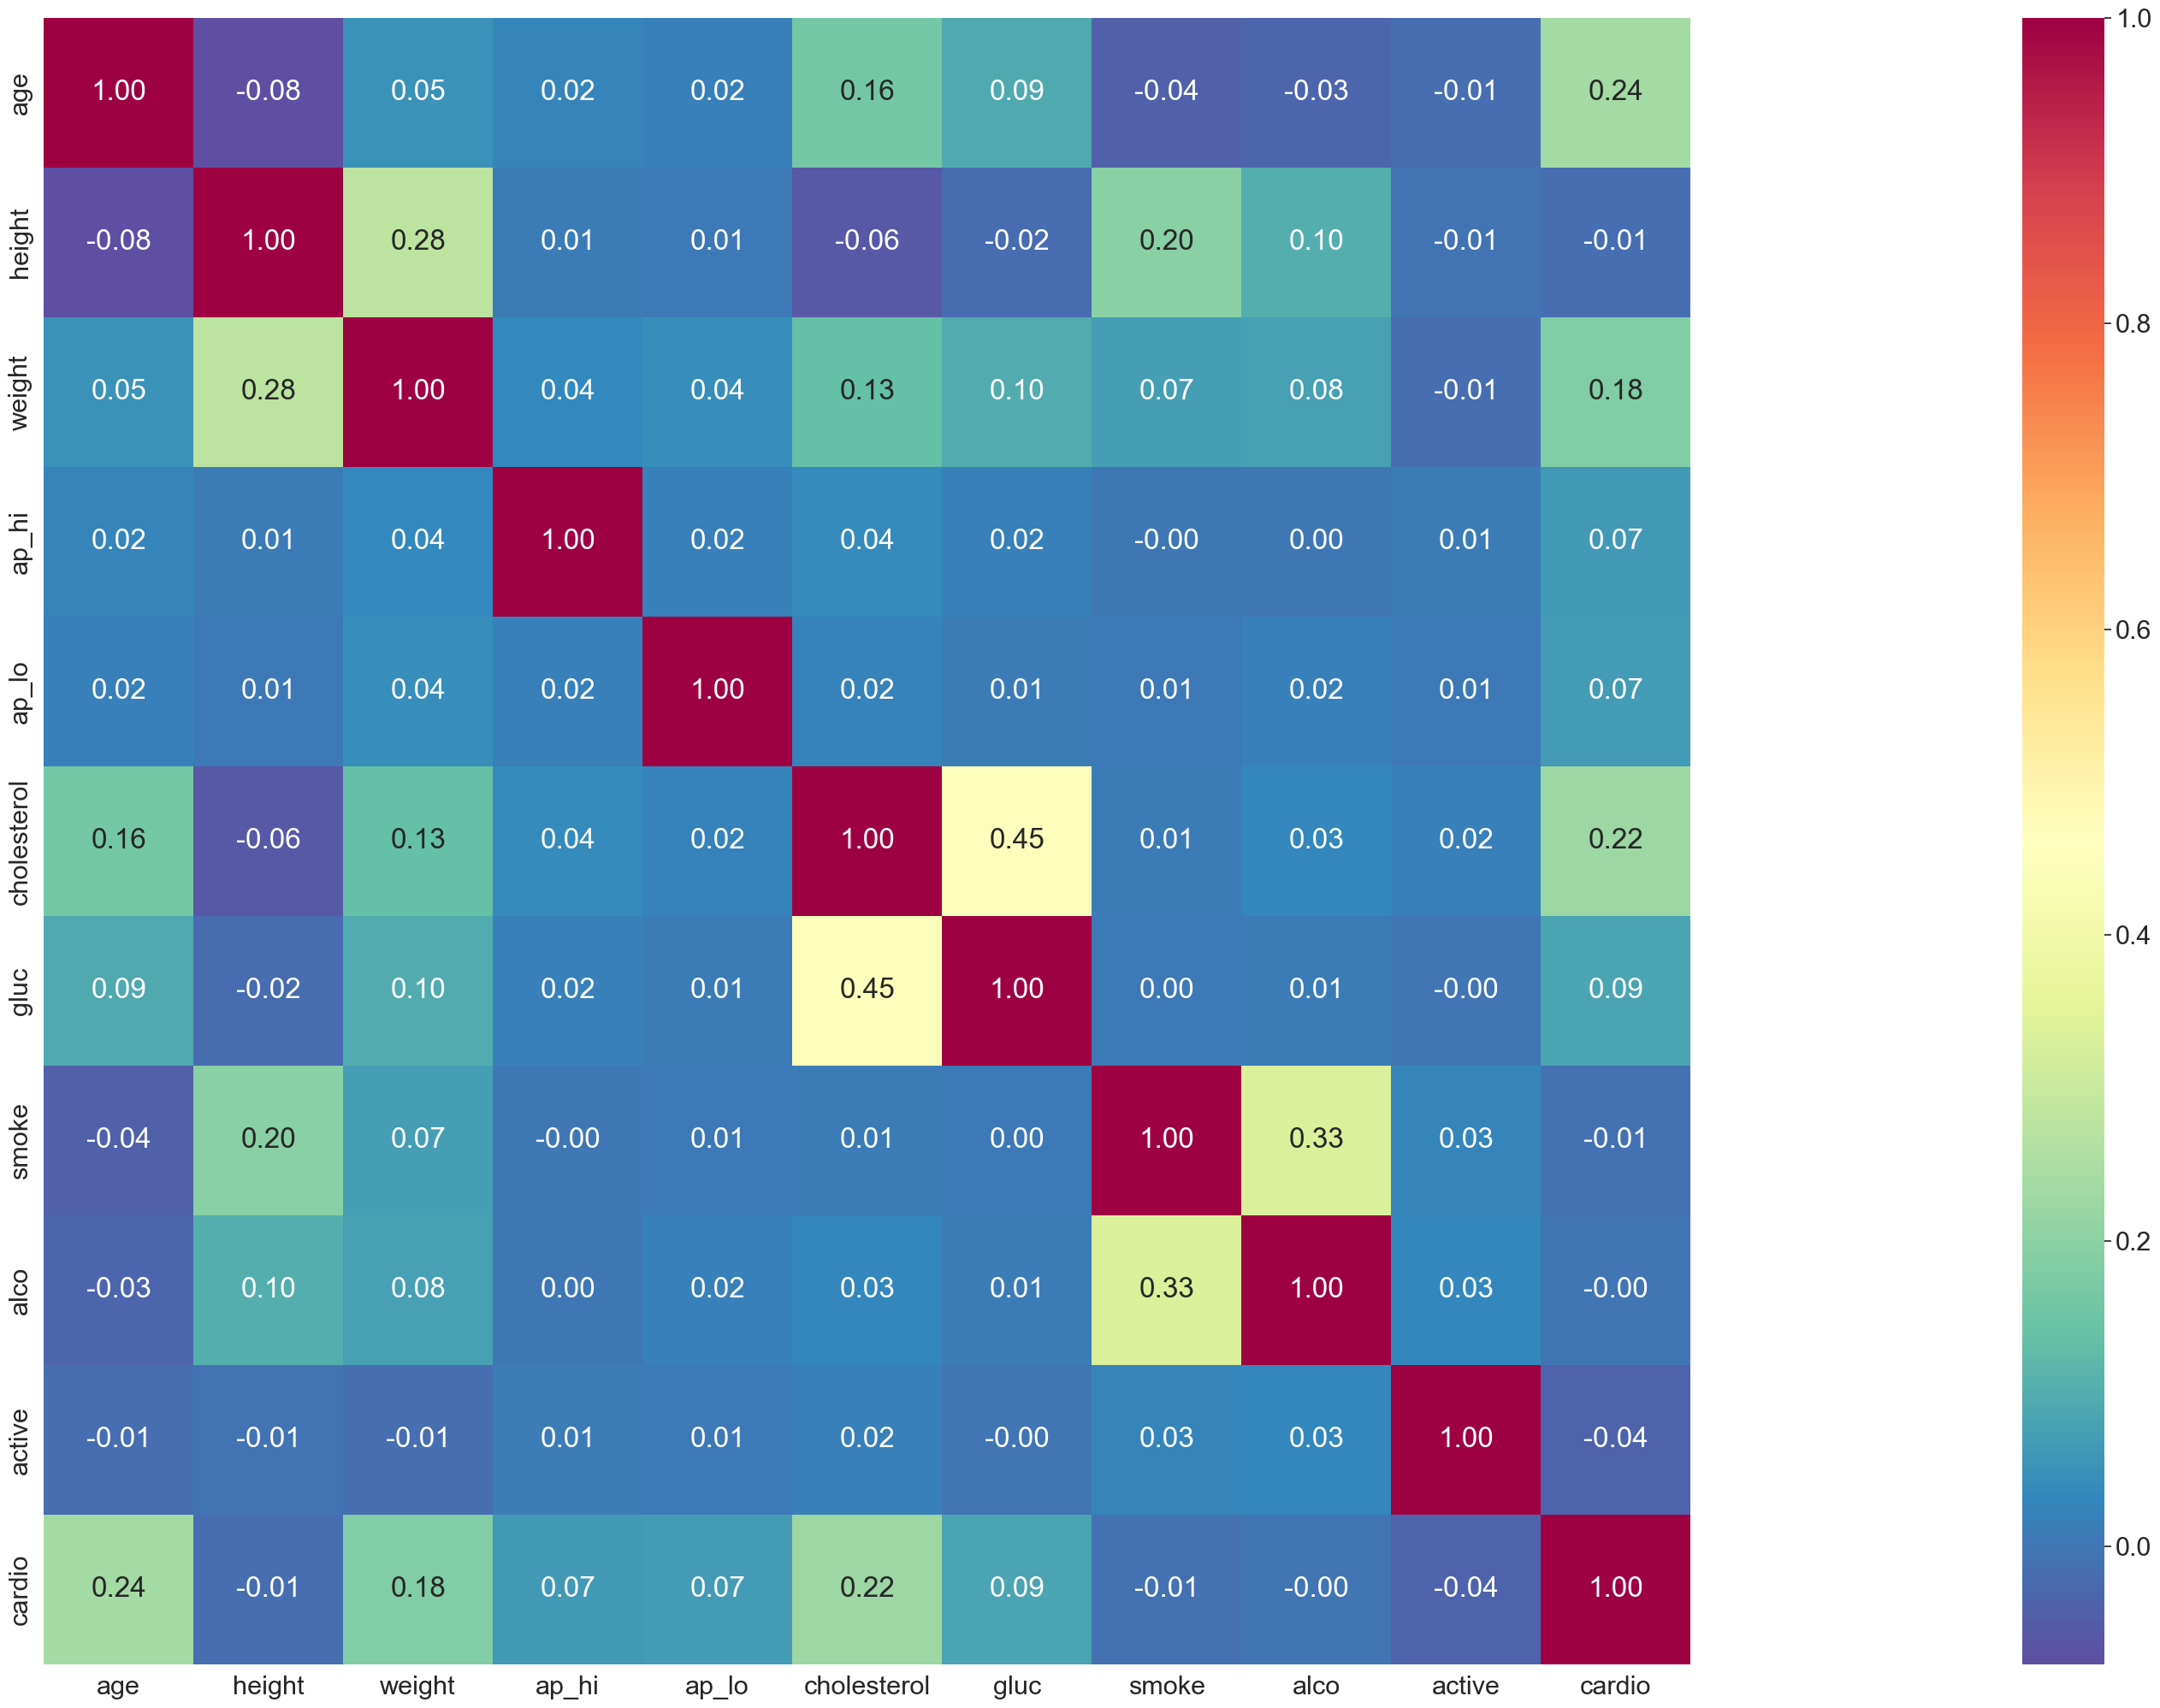

In [17]:
corrmat = df.corr()
plt.figure(figsize = (100,25))
sns.set(font_scale=2)
sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f',cmap="Spectral_r")
# We plot a correlation heat map showing how much each field is related to another.

In [18]:
columns_to_drop= ['height','smoke','alco','active']
df=df.drop(columns_to_drop,axis=1)
df.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,cardio
0,50,Female,62.0,110,80,1,1,0
1,55,Male,85.0,140,90,3,1,1
2,51,Male,64.0,130,70,3,1,1
3,48,Female,82.0,150,100,1,1,1
4,47,Male,56.0,100,60,1,1,0


### Imputing

As there are no missing values, we do not need to worry about them.

In [19]:
# One hot encoding of gender column
gender = pd.get_dummies(df['gender'],drop_first=True)
print(gender)

       Male
0         0
1         1
2         1
3         0
4         1
...     ...
30247     1
30248     0
30249     1
30250     1
30251     0

[30252 rows x 1 columns]


In [20]:
df_final = pd.concat([df,gender],axis=1)
df_final.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,Male
0,50,Female,62.0,110,80,1,1,0,0
1,55,Male,85.0,140,90,3,1,1,1
2,51,Male,64.0,130,70,3,1,1,1
3,48,Female,82.0,150,100,1,1,1,0
4,47,Male,56.0,100,60,1,1,0,1


In [21]:
df_final = df_final.drop('gender', axis=1)
df_final.head(3)

,age,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,Male
0,50,62.0,110,80,1,1,0,0
1,55,85.0,140,90,3,1,1,1
2,51,64.0,130,70,3,1,1,1


In [22]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30252 entries, 0 to 30251
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          30252 non-null  int32  
 1   weight       30252 non-null  float64
 2   ap_hi        30252 non-null  int64  
 3   ap_lo        30252 non-null  int64  
 4   cholesterol  30252 non-null  int64  
 5   gluc         30252 non-null  int64  
 6   cardio       30252 non-null  int64  
 7   Male         30252 non-null  uint8  
dtypes: float64(1), int32(1), int64(5), uint8(1)
memory usage: 1.5 MB


### Train Test Split 

In [23]:
Y = df_final['cardio']
X = df_final
X = X.drop('cardio', axis=1)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)  #0.2 denotes ratio size

In [25]:
import sklearn
print(sklearn.__version__)

1.3.0


### Feature Scaling

In [26]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_under = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
X_train_under

array([[ 0.02688549, -0.57083916, -0.12625822, ..., -0.53478832,
        -0.39308227,  0.73644356],
       [-1.88248785, -0.71002439, -0.0588583 , ..., -0.53478832,
        -0.39308227,  0.73644356],
       [-0.41373913, -0.08369086,  0.07594153, ...,  0.93861926,
        -0.39308227,  0.73644356],
       ...,
       [ 1.34875933,  0.57743897,  0.07594153, ..., -0.53478832,
        -0.39308227, -1.35787731],
       [-1.88248785,  0.33386482, -0.19365813, ..., -0.53478832,
        -0.39308227, -1.35787731],
       [ 0.90813472, -0.77961701,  0.07594153, ..., -0.53478832,
        -0.39308227, -1.35787731]])

### Creating a model

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_under,Y_train)
Y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,Y_pred)
print("model accuracy:", accuracy)

model accuracy: 0.7155842009585193


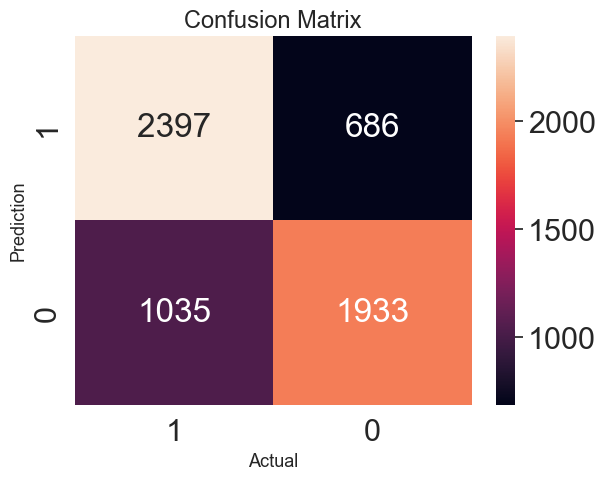

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['1','0'],
            yticklabels=['1','0'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()